## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [133]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [134]:
#reading the CSV file
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [135]:
# knowing the unique values for each column
df.group.unique(), df.landing_page.unique(), df.converted.unique()

(array(['control', 'treatment'], dtype=object),
 array(['old_page', 'new_page'], dtype=object),
 array([0, 1], dtype=int64))

b. Use the below cell to find the number of rows in the dataset.

In [136]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [137]:
unique_in_df=df.user_id.unique().shape[0]
unique_in_df

290584

d. The proportion of users converted.

In [138]:
unique_converted=df.query("converted==1").user_id.unique().shape[0]
portion_of_user_converted=unique_converted/unique_in_df
portion_of_user_converted

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [140]:
# the number of times that new page don't match with treatment group
new_page_not_treatment=df.query("landing_page=='new_page' and group!='treatment'")

# the number of times that old page came with treatment group.
old_page_and_treatment=df.query("landing_page=='old_page' and group=='treatment'")

#the number of times that new_page and treatment don't line up
new_page_not_treatment.shape[0]+old_page_and_treatment.shape[0]

3893

f. Do any of the rows have missing values?

In [141]:
df.info()
# there is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [142]:
#removing the rows where treatment dose not match with new_page
# or control dose not match with old_page
df2=df.drop(new_page_not_treatment.index)
df2=df2.drop(old_page_and_treatment.index)
df2.shape[0]

290585

In [143]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [144]:
df.user_id.unique().shape[0]

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [145]:
#finding the repeted user_id in df2
df2[df2.duplicated(["user_id"])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

the user_id of the duplicated row is 773192 as you can see above

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [146]:
df2.drop_duplicates(["user_id"],inplace=True)
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [147]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [148]:
#first making a data frame of control group only
df_control=df2.query("group=='control'")

#second applying a filter using query to know the probability
df_control.query("converted==1").user_id.unique().shape[0]/df_control.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [149]:
# we will apply the same steps as (b)
df_treatment=df2.query("group=='treatment'")
df_treatment.query("converted==1").user_id.unique().shape[0]/df_treatment.shape[0]


0.11880806551510564

d. What is the probability that an individual received the new page?

In [32]:
# we will apply a filter using query 
df2.query("landing_page=='new_page'").user_id.unique().shape[0]/df2.shape[0]

0.5000619442226688

In [150]:
#counts of individuals received new_page and old_page
df2.query("landing_page=='new_page'").shape[0],df2.query("landing_page=='old_page'").shape[0]

(145310, 145274)

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer.** 

    1. the users who received the new_page are almost equal to the users who received the old-page so the test is performed well.
    2. 0.12 of the population who received old_page were converted, and 0.1188 of the pobulatoin who received the new_page were converted.
    
#### So the answer is : No, there is no sufficent evidacne to say that the new_page leads to more convertion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer.**

**null_hypothesis:** H0: converted_rate_new <= converted_rate_old

**alternative_hypothesis:** H1: converted_rate_new > converted_rate_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [151]:
# as we assumed that under the null the convertion 
# rate of old_page and new_page are equal and will calculated 
# from the original dataset regardless of the page
old_conversion_rate=df.converted.mean()
old_conversion_rate

0.11965919355605512

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [152]:
#the new_conversion_rate is equal to old_conversion_rate
new_conversion_rate=old_conversion_rate
new_conversion_rate

0.11965919355605512

c. What is $n_{new}$?

In [153]:
# the number of new pages calculated after removed duplicates from df2
df_treatment=df2.query("group=='treatment'")
df_treatment.drop_duplicates(["user_id"],inplace=True)
df_treatment.shape[0]

<ipython-input-153-fb20fb611944>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treatment.drop_duplicates(["user_id"],inplace=True)


145310

d. What is $n_{old}$?

In [154]:
df_control=df2.query("group=='control'")
df_control.drop_duplicates(["user_id"],inplace=True)
df_control.shape[0]

<ipython-input-154-c7377bc729b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control.drop_duplicates(["user_id"],inplace=True)


145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [157]:
new_page_converted=df_treatment.query("converted==1").shape[0]/df_treatment.shape[0]
new_page_converted

0.11880806551510564

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [158]:
old_page_converted=df_control.query("converted==1").shape[0]/df_control.shape[0]
old_page_converted

0.1203863045004612

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [159]:
observation_diff=new_page_converted-old_page_converted
observation_diff

-0.0015782389853555567

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [160]:
p_diff=[]
sample=df2.sample(df.shape[0],replace=True)
for _ in range(10000):
    b_sample=sample.sample(10000,replace=True)
    df_treatment=b_sample.query("group=='treatment'")
    df_treatment.drop_duplicates(["user_id"],inplace=True)
    df_control=b_sample.query("group=='control'")
    df_control.drop_duplicates(["user_id"],inplace=True)
    new_page_converted=df_treatment.query("converted==1").shape[0]/df_treatment.shape[0]
    old_page_converted=df_control.query("converted==1").shape[0]/df_control.shape[0]
    p_diff.append(new_page_converted-old_page_converted)
    
p_diff=np.array(p_diff)
p_diff.mean()

<ipython-input-160-36816b860b02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treatment.drop_duplicates(["user_id"],inplace=True)
<ipython-input-160-36816b860b02>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_control.drop_duplicates(["user_id"],inplace=True)


-0.0015683083676670659

In [161]:
p_diff.std()

0.006370266289834883

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

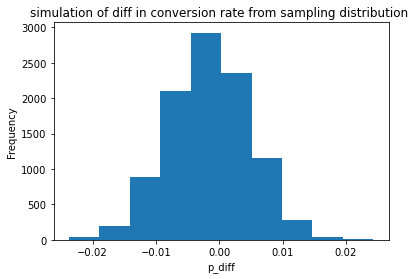

In [162]:
plt.hist(p_diff);
plt.xlabel("p_diff");
plt.ylabel("Frequency");
plt.title("simulation of diff in conversion rate from sampling distribution ");

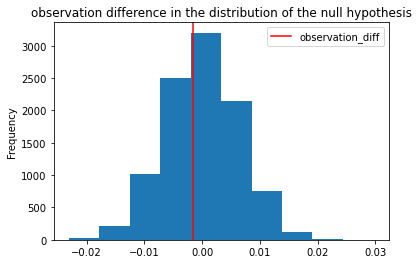

In [163]:
# ploting the null distribution with the same std as the sampling distribution 
null_value=np.random.normal(0,p_diff.std(),10000)
plt.hist(null_value);
plt.axvline(x=observation_diff,color="r",label="observation_diff");
plt.legend();
plt.title("observation difference in the distribution of the null hypothesis");
plt.ylabel("Frequency");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [165]:
# counting the p_value
(null_value > observation_diff).mean()

0.5995

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer.** as the p_value is grater than the type one error (alpha) 5% we don't have sufficent evedence to reject the null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [166]:
import statsmodels.api as sm

old_df=df2.query("landing_page=='old_page'")
new_df=df2.query("landing_page=='new_page'")

convert_old = old_df.converted.sum()
convert_new = new_df.converted.sum()
n_old = old_df.shape[0]
n_new = new_df.shape[0]

In [167]:
convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [168]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Using those linke 

1- to know how to performe ztest
    https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html
    
2- to know when to use ztest and how to write the results.
    https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/z-test/

**Answer.** after some research about the Z-test and the meaning of Z_score i found that with the confidence interval of 95% the Z_score must exeed 1.96 to reject the null hypothesis

So that, with our Z_score of 1.3109 we don't have sufficent evidence to reject the null hypothesis

yes those values are aligned with the values in the previous steps

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer.** we should perform the Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [169]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [170]:
#importing the required library
import statsmodels.api as sm

In [171]:
#creating the dummy variable
df2.group.unique()

array(['control', 'treatment'], dtype=object)

In [172]:
df2[['control', 'treatment']]=pd.get_dummies(df2["group"])

#ab_page column, which is 1 when an individual receives the treatment and 0 if control.
df2.rename(columns={"treatment":"ab_page"},inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [173]:
#creating the intercept column
df2["intercept"]=1

#applying the logistic regression 
log_mod=sm.Logit(df2["converted"],df2[["intercept","ab_page"]])
results=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [174]:
# providing summary for the logistic regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        11:22:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

using this page to refresh our understanding of the P_value assossiated with the logistic regression and how we can write a result depend on it.
https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/binary-logistic-regression/interpret-the-results/key-results/

**Answer.** 

**null hypothesis:** convertion_rate_new == conversion_rate_old

**alternative hypothesis:** conversion_rate_new != conversion_rate_old

the p_value associated with the ab_page is 0.190 so we don't have a statically significant to reject the null hypothesis. 

the reson of the difference in part two and part three is: part two is one side test acourding to the alternative sign  ( > )
and part three is two side test acourding to the alternative sign ( != )

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer.** 
it is good to consider other factors because the more factors we analyse the more accurate decission we take

the dissadvantage is:

but we need to consider that the significant bivariate relationships are not always significant in multiple regression. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [175]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,control,ab_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1


In [176]:
# knowing the unique values in the country column
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [177]:
### Create the necessary dummy variables
df_new[['UK', 'US', 'CA']]=pd.get_dummies(df_new["country"])
df_new.head()

,country,timestamp,group,landing_page,converted,control,ab_page,intercept,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,1,0,1,0


In [179]:
#reating intercept 
df_new["intercept"]=1

#creating a ligistic regression model and droping one column from the dummies
log_mod=sm.Logit(df_new["converted"],df_new[["intercept","ab_page","US","CA"]])
results=log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 27 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        11:23:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0506      0.028      1.784      0.074      -0.005       0.106
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

there is no p_value less than the type one error (alpha) so we don't have a suffecient evidence to reject the null hypothesis

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [180]:
### Fit Your Linear Model And Obtain the Results

# making interaction columns between page and country
df_new["ab_us"]=df_new["ab_page"]* df_new["US"]
df_new["ab_ca"]=df_new["ab_page"]* df_new["CA"]

#applying the regression model
log_mod=sm.Logit(df_new["converted"],df_new[["intercept","ab_page","UK","US","ab_us","ab_ca"]])
results=log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 27 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        11:24:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK            -0.0175      0.038     -0.465      0.642      -0.091       0.056
US            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_us          0.0783      0.057      1.378      0.168      -0.033       0.190
ab_ca          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

there is no p_value less than the type one error (alpha) so we don't have a suffecient evidence to reject the null hypothesis

### Summary and conclusion on regression 
1. part ΙΙ (A/B test) results that p_value is more than 0.05
2. part ΙΙΙ Regression show that the p_vlaue is higher than (alpha) and Z_score is less than 1.96
3. there is no high effect on the regression based on the country

<a id='conclusions'></a>
## Conclusions

there is no sufficient evidence told us that the new page has more conversion rate than the old page